In [1]:
from f3dasm.simulation.benchmark_functions import Levy, Ackley, Rastrigin, Schwefel, create_test_data, Rosenbrock
from f3dasm.src.space import ContinuousSpace, CategoricalSpace
from f3dasm.src.designofexperiments import DoE
from f3dasm.sampling.randomuniform import RandomUniform
from f3dasm.src.data import Data

from IPython.display import display

In [2]:
seed = 42

Define the parameters `x1` and `x2` and the output `y`

In [3]:
# Input parameters
x1 = ContinuousSpace(name="x1", lower_bound=-10., upper_bound=10.)
x2 = ContinuousSpace(name="x2", lower_bound=-10., upper_bound=10.)
x3 = ContinuousSpace(name="x3", lower_bound=-10., upper_bound=10.)

# Output parameters
y = ContinuousSpace(name="y")

We construct 2 lists of these parameters and construct the designspace: 

In [4]:
input_space = [x1, x2, x3]
output_space = [y]

# Construct the design space
design = DoE(input_space=input_space, output_space=output_space)

To sample from the design space, we need a samples. We choose the default `RandomUniform` sampler:

In [5]:
# Construct sampler
random_uniform = RandomUniform(doe=design, seed=seed)

By invoking the `get_samples()` method, we obtain samples according to the sampling strategy:

In [6]:
N = 20 # Number of samples
data = random_uniform.get_samples(numsamples=N)

The data can be displayed with the `show()` method

In [7]:
data.show()

       input                     output
          x1        x2        x3      y
0  -2.509198  9.014286  4.639879    NaN
1   1.973170 -6.879627 -6.880110    NaN
2  -8.838328  7.323523  2.022300    NaN
3   4.161452 -9.588310  9.398197    NaN
4   6.648853 -5.753218 -6.363501    NaN
5  -6.331910 -3.915155  0.495129    NaN
6  -1.361100 -4.175417  2.237058    NaN
7  -7.210123 -4.157107 -2.672763    NaN
8  -0.878600  5.703519 -6.006524    NaN
9   0.284689  1.848291 -9.070992    NaN
10  2.150897 -6.589518 -8.698968    NaN
11  8.977711  9.312641  6.167947    NaN
12 -3.907725 -8.046558  3.684661    NaN
13 -1.196950 -7.559235 -0.096462    NaN
14 -9.312230  8.186408 -4.824400    NaN
15  3.250446 -3.765778  0.401360    NaN
16  0.934206 -6.302911  9.391693    NaN
17  5.502656  8.789979  7.896547    NaN
18  1.958000  8.437485 -8.230150    NaN
19 -6.080343 -9.095454 -3.493393    NaN


## Evaluating a benchmark function

(<Figure size 504x504 with 1 Axes>,
 <Axes3DSubplot:xlabel='$X_{1}$', ylabel='$X_{2}$'>)

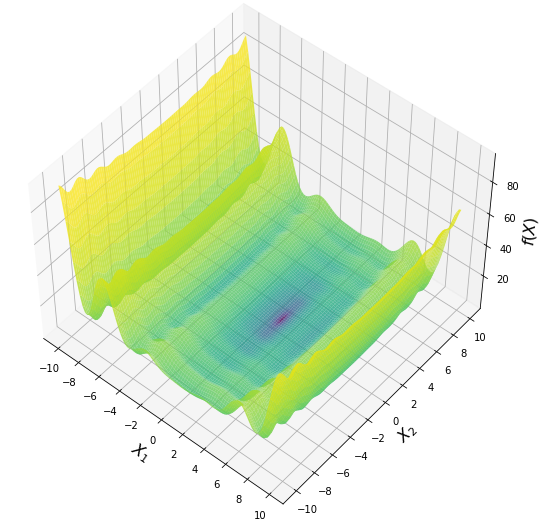

In [8]:
func = Levy(seed=seed)
func.plot(px=100, domain=[-10.,10.])

In [9]:
y = func.eval(data)
y
yy = y.ravel()
data.data.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

In [10]:
data.add_output(output=yy, label='y')
data.data

input                         output
          x1        x2        x3          y
0  -2.509198  9.014286  4.639879  42.258090
1   1.973170 -6.879627 -6.880110  39.654900
2  -8.838328  7.323523  2.022300  23.241226
3   4.161452 -9.588310  9.398197  66.300860
4   6.648853 -5.753218 -6.363501  46.754911
5  -6.331910 -3.915155  0.495129  39.834610
6  -1.361100 -4.175417  2.237058   5.203225
7  -7.210123 -4.157107 -2.672763  30.236292
8  -0.878600  5.703519 -6.006524  23.014778
9   0.284689  1.848291 -9.070992   7.281533
10  2.150897 -6.589518 -8.698968  45.962858
11  8.977711  9.312641  6.167947  77.826637
12 -3.907725 -8.046558  3.684661  10.658422
13 -1.196950 -7.559235 -0.096462  20.284762
14 -9.312230  8.186408 -4.824400  52.385663
15  3.250446 -3.765778  0.401360   5.295619
16  0.934206 -6.302911  9.391693  42.520226
17  5.502656  8.789979  7.896547  44.201685
18  1.958000  8.437485 -8.230150  24.218929
19 -6.080343 -9.095454 -3.493393  65.508479

In [11]:
import numpy as np
a = np.array([[0.3,0.2,0.1],[0.0,0.0,0.0]])
y = func.eval(a)
y.ravel()

array([0.55439558, 0.80668911])

In [12]:
a

array([[0.3, 0.2, 0.1],
       [0. , 0. , 0. ]])

In [13]:
b = np.array([[0.1,0.1,0.1]])


In [14]:
import numdifftools as nd

In [15]:
grad = nd.Gradient(func.eval)

In [16]:
grad

In [17]:
grad(b)

array([-0.76218054,  0.01354807, -0.24682044])

In [18]:
grad(a)

array([-0.76451387, -0.01928881,  0.01354807,  0.02258649,  0.02258649,
       -0.25      ])